In [44]:
import torch
import sys
sys.path.append('../../modules')
from notable_functions import runge_function as fn
from nn_poly import PolynomialInterpolant
import matplotlib.pyplot as plt
from grid_utils import cheb_points

In [45]:
# Verification data and plots
colors = ['red', 'blue', 'green', 'purple']
x_ver = torch.linspace(-1, 1, 300).reshape((-1, 1))
y_ver = fn(x_ver)

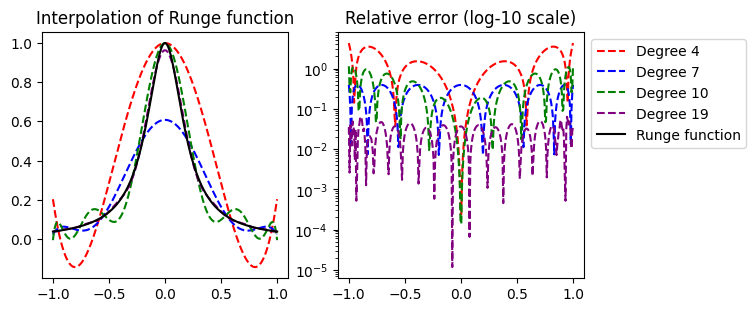

In [46]:
fig = plt.figure(figsize=(7, 3.2))

i = 0
for n in [5, 8, 11, 20]:
    x_cheb = cheb_points(n).reshape((-1, 1))
    y_cheb = fn(x_cheb)

    poly = PolynomialInterpolant(degree=n-1)
    opt_coefs = torch.linalg.solve(poly.get_interpolation_matrix(x_cheb), y_cheb)
    poly.set_coefs(opt_coefs.T)
    
    with torch.no_grad():
        plt.subplot(1,2,1)
        plt.plot(x_ver, poly(x_ver), color=colors[i], label=f'Degree {n - 1}', linestyle='--')
        plt.subplot(1,2,2)
        plt.semilogy(x_ver, torch.abs(poly(x_ver) - y_ver) / y_ver, color=colors[i], label=f'Degree {n - 1}', linestyle='--')
    i += 1

plt.subplot(1,2,1)
plt.plot(x_ver, y_ver, color='black', label='Runge function')
plt.title('Interpolation of Runge function')
handles, labels = plt.gca().get_legend_handles_labels()

plt.subplot(1,2,2)
plt.title('Relative error (log-10 scale)')
plt.legend(handles = handles, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('aaa.pdf', bbox_inches='tight')